In [1]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer
import numpy as np

In [2]:
import nltk
import re

In [102]:
import matplotlib.pyplot as plt # subjectively ugly plotting here
from seaborn import countplot

In [3]:
#dlr = nltk.downloader.Downloader()
#dlr._update_index()
#dlr.download('wordnet')
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords

In [4]:
data_loc = 'data/'

In [5]:
data1 = pd.read_csv('winemag-data_first150k.csv', index_col=0)
data2 = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

In [6]:
#Panen andmed kokku
dataset = pd.concat([data1,data2])

In [7]:
dataset.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [8]:
#Vaatan, mis toimub
dataset.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [9]:
new_stopwords = dataset.country.astype(str).unique().tolist()
new_stopwords = [x.lower() for x in new_stopwords]
#new_stopwords[0:5]

In [10]:
stop_phrases = dataset.variety.astype(str).unique().tolist()
stop_phrases = [x.lower() for x in stop_phrases]

In [11]:
country_phrases = [x for x in new_stopwords if " " in x]

In [12]:
stop_phrases.extend(country_phrases)

In [13]:
new_stopwords = list(filter(lambda x: x not in country_phrases, new_stopwords))

In [14]:
variety_words = [x for x in stop_phrases if " " not in x]

In [15]:
new_stopwords.extend(variety_words)

In [16]:
stop_phrases = list(filter(lambda x: x not in variety_words, stop_phrases))

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
desc = dataset.description

In [19]:
reviews_lower = [x.lower() for x in desc]

In [20]:
reviews_lower_cl = [re.sub('[(.,!?)]', '', x) for x in reviews_lower]

In [21]:
reviews_lower_cl[0]

'this tremendous 100% varietal wine hails from oakville and was aged over three years in oak juicy red-cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 2022–2030'

In [22]:
reviews_sent = [nltk.sent_tokenize(x) for x in reviews_lower_cl]

In [23]:
reviews_sent = [y for x in reviews_sent for y in x]

In [24]:
reviews_sent[0]

'this tremendous 100% varietal wine hails from oakville and was aged over three years in oak juicy red-cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannins and a subtle minty tone in the background balanced and rewarding from start to finish it has years ahead of it to develop further nuance enjoy 2022–2030'

In [25]:
reviews_words = [nltk.word_tokenize(x) for x in reviews_sent]

In [26]:
reviews_words[0]

['this',
 'tremendous',
 '100',
 '%',
 'varietal',
 'wine',
 'hails',
 'from',
 'oakville',
 'and',
 'was',
 'aged',
 'over',
 'three',
 'years',
 'in',
 'oak',
 'juicy',
 'red-cherry',
 'fruit',
 'and',
 'a',
 'compelling',
 'hint',
 'of',
 'caramel',
 'greet',
 'the',
 'palate',
 'framed',
 'by',
 'elegant',
 'fine',
 'tannins',
 'and',
 'a',
 'subtle',
 'minty',
 'tone',
 'in',
 'the',
 'background',
 'balanced',
 'and',
 'rewarding',
 'from',
 'start',
 'to',
 'finish',
 'it',
 'has',
 'years',
 'ahead',
 'of',
 'it',
 'to',
 'develop',
 'further',
 'nuance',
 'enjoy',
 '2022–2030']

In [27]:
for i in range(len(reviews_words)):
    reviews_words[i] = [lemmatizer.lemmatize(w) for w in reviews_words[i]]

In [28]:
reviews_lemmatized = [' '.join(x) for x in reviews_words]

In [29]:
reviews_lemmatized[0]

'this tremendous 100 % varietal wine hail from oakville and wa aged over three year in oak juicy red-cherry fruit and a compelling hint of caramel greet the palate framed by elegant fine tannin and a subtle minty tone in the background balanced and rewarding from start to finish it ha year ahead of it to develop further nuance enjoy 2022–2030'

In [30]:
stop_phrases[0]

'cabernet sauvignon'

In [31]:
#To check if stop phrase removal actually works, we find one description with stop phrase "cabernet sauvignon" and its index
for i in range(len(reviews_lemmatized)):
    if stop_phrases[0] in reviews_lemmatized[i]:
        print(reviews_lemmatized[i])
        print("Index:", i)
        break

this savory blend of 40 % merlot 30 % cabernet sauvignon 25 % cabernet franc and 5 % syrah open with aroma of roasted coffee bean leather tobacco and dark woodland berry the chewy palate offer juicy plum cassis and clove alongside polished tannin drink through 2019
Index: 59


In [32]:
#Removing stop phrases
for x in stop_phrases:
    for i in range(len(reviews_lemmatized)):
        reviews_lemmatized[i] = re.sub(x, "", reviews_lemmatized[i])

In [33]:
reviews_lemmatized[59]

'this savory blend of 40 % merlot 30 %  25 %  and 5 % syrah open with aroma of roasted coffee bean leather tobacco and dark woodland berry the chewy palate offer juicy plum cassis and clove alongside polished tannin drink through 2019'

In [34]:
#Further cleanup
cleaned_reviews = [re.sub('[^a-zA-Z-]', ' ', x) for x in reviews_lemmatized]
cleaned_reviews = [re.sub(r'\s+', ' ', x) for x in cleaned_reviews]

In [35]:
cleaned_reviews[59]

'this savory blend of merlot and syrah open with aroma of roasted coffee bean leather tobacco and dark woodland berry the chewy palate offer juicy plum cassis and clove alongside polished tannin drink through '

In [36]:
#Tokenizing the descriptions again
reviews = [nltk.word_tokenize(x) for x in cleaned_reviews]

In [37]:
reviews[59]

['this',
 'savory',
 'blend',
 'of',
 'merlot',
 'and',
 'syrah',
 'open',
 'with',
 'aroma',
 'of',
 'roasted',
 'coffee',
 'bean',
 'leather',
 'tobacco',
 'and',
 'dark',
 'woodland',
 'berry',
 'the',
 'chewy',
 'palate',
 'offer',
 'juicy',
 'plum',
 'cassis',
 'and',
 'clove',
 'alongside',
 'polished',
 'tannin',
 'drink',
 'through']

In [38]:
stop_words = stopwords.words('english')
stop_words.extend(new_stopwords)

In [39]:
for i in range(len(reviews)):
    reviews[i] = [w for w in reviews[i] if w not in stop_words and len(w) > 2 if w != 'no']

In [40]:
reviews[59]

['savory',
 'blend',
 'open',
 'aroma',
 'roasted',
 'coffee',
 'bean',
 'leather',
 'tobacco',
 'dark',
 'woodland',
 'berry',
 'chewy',
 'palate',
 'offer',
 'juicy',
 'plum',
 'cassis',
 'clove',
 'alongside',
 'polished',
 'tannin',
 'drink']

In [41]:
model = Word2Vec(reviews, vector_size = 200 , window = 4 , min_count = 1,
                               seed = 1000, hs = 0, negative = 10,workers=16, epochs = 25)

In [42]:
model.save("word2vec.model")

In [59]:
model = Word2Vec.load("word2vec.model")

In [60]:
model.wv.most_similar('sweet')

[('sweetened', 0.5852560997009277),
 ('flavor', 0.5016254782676697),
 ('sugared', 0.47867006063461304),
 ('sweetness', 0.4755883812904358),
 ('sweet-tasting', 0.46789807081222534),
 ('vanilla', 0.46550998091697693),
 ('candied', 0.4614405333995819),
 ('sugary', 0.4556955397129059),
 ('jam', 0.4547452926635742),
 ('ripe', 0.45299452543258667)]

In [61]:
model.wv.most_similar('dry')

[('bone-dry', 0.5593643188476562),
 ('dryness', 0.5414596796035767),
 ('drily', 0.4645724892616272),
 ('dryish', 0.39528146386146545),
 ('fine', 0.3658676743507385),
 ('framing', 0.3652210533618927),
 ('scour', 0.36322686076164246),
 ('brisk', 0.3630562424659729),
 ('bite', 0.36218559741973877),
 ('drier', 0.34734490513801575)]

In [46]:
reviews[0]

['tremendous',
 'varietal',
 'wine',
 'hail',
 'oakville',
 'aged',
 'three',
 'year',
 'oak',
 'juicy',
 'red-cherry',
 'fruit',
 'compelling',
 'hint',
 'caramel',
 'greet',
 'palate',
 'framed',
 'elegant',
 'fine',
 'tannin',
 'subtle',
 'minty',
 'tone',
 'background',
 'balanced',
 'rewarding',
 'start',
 'finish',
 'year',
 'ahead',
 'develop',
 'nuance',
 'enjoy']

In [47]:
reviews[1]

['ripe',
 'aroma',
 'fig',
 'blackberry',
 'cassis',
 'softened',
 'sweetened',
 'slathering',
 'oaky',
 'chocolate',
 'vanilla',
 'full',
 'layered',
 'intense',
 'cushioned',
 'palate',
 'rich',
 'flavor',
 'chocolaty',
 'black',
 'fruit',
 'baking',
 'spice',
 'toasty',
 'everlasting',
 'finish',
 'heady',
 'ideally',
 'balanced',
 'drink']

In [48]:

#!pip install pyemd


In [49]:
from pyemd import emd

In [50]:

distance = model.wv.wmdistance(reviews[0], reviews[1])
distance

1.0544303981085248

In [51]:

#from scipy.sparse import csr_matrix
#from sklearn.decomposition import TruncatedSVD

In [52]:
print(dataset.variety.isnull().sum())
print(dataset.province.isnull().sum())
print(dataset.country.isnull().sum())
print(dataset.description.isnull().sum())

1
68
68
0


In [53]:
data = dataset.loc[:,  

               ["variety","country","province","points","price"]]

data['review']=reviews
data

,variety,country,province,points,price,review
0,Cabernet Sauvignon,US,California,96,235.0,"[tremendous, varietal, wine, hail, oakville, a..."
1,Tinta de Toro,Spain,Northern Spain,96,110.0,"[ripe, aroma, fig, blackberry, cassis, softene..."
2,Sauvignon Blanc,US,California,96,90.0,"[mac, watson, honor, memory, wine, made, mothe..."
3,Pinot Noir,US,Oregon,96,65.0,"[spent, month, new, french, oak, incorporates,..."
4,Provence red blend,France,Provence,95,66.0,"[top, wine, gude, named, highest, point, viney..."
...,...,...,...,...,...,...
129966,Riesling,Germany,Mosel,90,28.0,"[note, honeysuckle, cantaloupe, sweeten, delic..."
129967,Pinot Noir,US,Oregon,90,75.0,"[citation, given, much, decade, bottle, age, p..."
129968,Gewürztraminer,France,Alsace,90,30.0,"[well-drained, gravel, soil, give, wine, crisp..."
129969,Pinot Gris,France,Alsace,90,32.0,"[dry, style, crisp, acidity, also, weight, sol..."


In [286]:
print('Number of variety of grapes',data['variety'].nunique())

Number of variety of grapes 756


In [58]:
data.shape

(280901, 6)

In [330]:
dvariety = data.loc[:,["variety","review"]]
dvariety.shape

(280901, 2)

In [331]:
dvariety =dvariety.dropna()
dvariety.shape

(280900, 2)

In [371]:
filtered= dvariety.pivot_table(index= "variety", values="review", aggfunc="count")
filtered= filtered.sort_values(by=['review'], ascending=False)
filtered['index1'] = filtered.index
#filtered = filtered.reset_index().rename_axis(None, 1)
filtered

,review,index1
variety,,
Pinot Noir,27563,Pinot Noir
Chardonnay,26235,Chardonnay
Cabernet Sauvignon,22272,Cabernet Sauvignon
Red Blend,19008,Red Blend
Bordeaux-style Red Blend,14262,Bordeaux-style Red Blend
...,...,...
Folle Blanche,1,Folle Blanche
Malbec-Carménère,1,Malbec-Carménère
Tsolikouri,1,Tsolikouri


In [366]:
#index = pd.Index(range(0, len(filtered), 1))
#filtered = filtered.set_index(index)
#filtered

,review,index1
0,27563,Pinot Noir
1,26235,Chardonnay
2,22272,Cabernet Sauvignon
3,19008,Red Blend
4,14262,Bordeaux-style Red Blend
...,...,...
751,1,Folle Blanche
752,1,Malbec-Carménère
753,1,Tsolikouri
754,1,Tsapournakos


In [372]:
UpTo100counts = filtered[:135]
UpTo100counts

,review,index1
variety,,
Pinot Noir,27563,Pinot Noir
Chardonnay,26235,Chardonnay
Cabernet Sauvignon,22272,Cabernet Sauvignon
Red Blend,19008,Red Blend
Bordeaux-style Red Blend,14262,Bordeaux-style Red Blend
...,...,...
Weissburgunder,103,Weissburgunder
Petite Verdot,102,Petite Verdot
Cabernet Sauvignon-Carmenère,101,Cabernet Sauvignon-Carmenère


In [378]:
fseries = pd.Series(filtered['index1'])
names100counts= fseries.to_numpy()
names100counts

array(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend',
       'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Riesling', 'Syrah',
       'Merlot', 'Zinfandel', 'Rosé', 'Sangiovese', 'Malbec',
       'White Blend', 'Nebbiolo', 'Portuguese Red', 'Tempranillo',
       'Sparkling Blend', 'Rhône-style Red Blend', 'Pinot Gris', 'Shiraz',
       'Cabernet Franc', 'Champagne Blend', 'Grüner Veltliner',
       'Pinot Grigio', 'Bordeaux-style White Blend',
       'Corvina, Rondinella, Molinara', 'Viognier', 'Portuguese White',
       'Sangiovese Grosso', 'Barbera', 'Gewürztraminer', 'Port',
       'Petite Sirah', 'Gamay', 'Tempranillo Blend', 'Chenin Blanc',
       'Carmenère', 'Glera', 'Grenache', 'Albariño', 'Pinot Blanc',
       'Rhône-style White Blend', 'Prosecco', "Nero d'Avola", 'Moscato',
       'Garnacha', 'Aglianico', 'Garganega', 'Torrontés', 'Verdejo',
       'Sauvignon', 'Meritage', 'Montepulciano', 'Dolcetto', 'Primitivo',
       'Petit Verdot', 'Vermentino', 'Blaufr

In [67]:
prev = pd.Series(dvariety['review'])
nrev = pandasrev.to_numpy()
type(nrev)

numpy.ndarray

In [68]:
nvariety = pd.Series(dvariety['variety']).to_numpy()
type(nvariety)

numpy.ndarray

In [70]:
train_data= nrev[:2000]
train_labels= nvariety[:2000]
test_data= nrev[2000:3000]
test_labels= nvariety[2000:3000]
train_data.shape

(2000,)

In [80]:
varietylist= dvariety['variety'].unique()
len(varietylist)

757

In [94]:
nvariety= nvariety.astype(str)
nvariety.dtype

dtype('<U35')

<AxesSubplot:ylabel='count'>

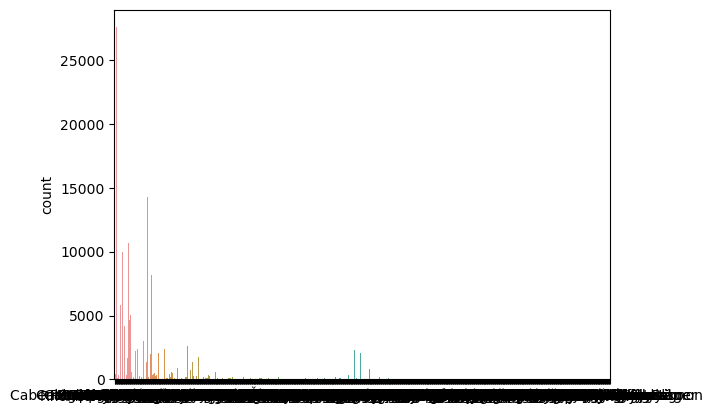

In [104]:
countplot(x=nvariety)

<AxesSubplot:ylabel='count'>

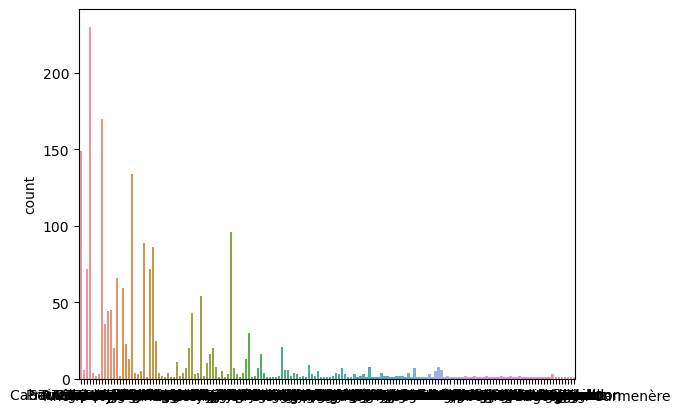

In [103]:
countplot(x=train_labels)

In [106]:
def dist(rev1, rev2):
  return model.wv.wmdistance(rev1, rev2)


In [107]:
dist(reviews[0], reviews[1])

1.0544303981085248

In [172]:
test_review = test_data[1] 
test_label = test_labels[1]

In [138]:
# list comprehension version
# [<expression with element> for <element> in <list/array>]
all_distances = [dist(test_review, train_review) for train_review in train_data]
print(all_distances[:5])

[1.1622806292315553, 1.1053647150809471, 1.0867855485292721, 1.1743931981343962, 1.0661745158487266]


In [123]:
min(all_distances)

0.8900196881395704

In [124]:
i = np.argmin(all_distances) #index of the shortest distanced review

In [125]:
predicted_label = train_labels[i]

In [126]:
print(predicted_label)

Portuguese Red


In [127]:
print(f"Predicted variety for the first wine is {predicted_label} and the true label is {test_label}")

Predicted variety for the first wine is Portuguese Red and the true label is Bordeaux-style Red Blend


In [128]:
def classify(test_review):
  all_distances = [dist(test_review, train_review) for train_review in train_data]
  prediction = train_labels[np.argmin(all_distances)]
  return prediction

In [131]:
test_predicted = [classify(test_review) for test_review in test_data]

In [132]:
n_correct = np.sum(test_labels == test_predicted)
print(f"Number of correctly predicted varieties is {n_correct}")

Number of correctly predicted varieties is 285


In [137]:
accuracy = n_correct/len(test_labels)
print(accuracy)
#Accuracy of the Word Mover's Distance classifier in predicting the grape variety

0.285


In [139]:
nimik= all_distances[:10]
nimik

[1.1622806292315553,
 1.1053647150809471,
 1.0867855485292721,
 1.1743931981343962,
 1.0661745158487266,
 1.1411924837923975,
 1.2394200078409043,
 1.2106068626688478,
 1.1145809545003997,
 1.0797468146995837]

In [148]:
nimik.sort()
nimik

[1.0661745158487266,
 1.0797468146995837,
 1.0867855485292721,
 1.1053647150809471,
 1.1145809545003997,
 1.1411924837923975,
 1.1622806292315553,
 1.1743931981343962,
 1.2106068626688478,
 1.2394200078409043]

In [170]:
#ei k6lba
arr = np.array(["koer", "kass", "koer","koer","koer"])
#find unique values in array along with their counts
vals, counts = np.unique(arr, return_counts=True)

#find mode
mode = np.where(counts == np.max(counts))
mode

(array([1], dtype=int64),)

In [169]:
arr = np.array(["koer", "kass", "koer","koer","koer"])
unique,pos = np.unique(arr,return_inverse=True) #Finds all unique elements and their positions
counts = np.bincount(pos)                     #Count the number of each unique element
maxpos = counts.argmax()                      #Finds the positions of the maximum count

(unique[maxpos],counts[maxpos])

('koer', 4)

In [167]:
def k_nearest(distancelist, k):
    idx=np.array(distancelist.argsort())
    k_nearest_labels=np.array(distancelist[idx][:k])
    return k_nearest

In [269]:
#proovime n lähimaga
def classify(test_review,k):
    all_distances = np.array([dist(test_review, train_review) for train_review in train_data])
    sorted_idx = all_distances.argsort()
    n_closest = train_labels[sorted_idx][:k]
    unique, pos = np.unique(n_closest,return_inverse=True)
    counts = np.bincount(pos)
    maxpos = counts.argmax()
    prediction= unique[maxpos]
    return prediction

In [281]:
k=100
all_distances = np.array([dist(test_review, train_review) for train_review in train_data])
sorted_idx = all_distances.argsort()
n_closest = train_labels[sorted_idx][:k]
unique, pos = np.unique(n_closest,return_inverse=True)
counts = np.bincount(pos)
maxpos = counts.argmax()
prediction= unique[maxpos]


In [282]:
n_closest

array(['Portuguese Red', 'Red Blend', 'Tannat-Cabernet Franc',
       'Portuguese Red', 'Bordeaux-style Red Blend', 'Touriga Nacional',
       'Bordeaux-style Red Blend', 'Bordeaux-style Red Blend',
       'Portuguese Red', 'Sauvignon Blanc', 'Baga',
       'Bordeaux-style Red Blend', 'Malbec',
       'Touriga Nacional-Cabernet Sauvignon', 'Portuguese Red',
       'Bordeaux-style Red Blend', 'Pinot Noir', 'Tannat',
       'Portuguese Red', 'Portuguese Red', 'Malbec-Merlot',
       'Portuguese Red', 'Portuguese Red', 'Bordeaux-style Red Blend',
       'Pinot Noir', 'Pinot Noir', 'Portuguese Red', 'Portuguese Red',
       'Bordeaux-style Red Blend', 'Bordeaux-style Red Blend',
       'Bordeaux-style Red Blend', 'Malbec', 'Touriga Nacional',
       'Pinot Noir', 'Bordeaux-style Red Blend',
       'Bordeaux-style Red Blend', 'Champagne Blend', 'Duras',
       'Portuguese Red', 'Chardonnay', 'Chardonnay', 'Sparkling Blend',
       'Malbec', 'Portuguese Red', 'Rosé', 'Riesling',
       'Bord

In [268]:
prediction

'Bordeaux-style Red Blend'

In [278]:
perdicted_label = classify(test_review,100)

In [279]:
print(f"Predicted variety for the first wine is {perdicted_label} and the true label is {test_label}")

Predicted variety for the first wine is Portuguese Red and the true label is Bordeaux-style Red Blend


In [202]:
type(all_distances)

list

In [212]:
proovilist=[3,6,0,7,2,6]
proovilist

[3, 6, 0, 7, 2, 6]

In [208]:
proovilist.sort()
print(proovilist)

[0, 2, 3, 6, 6, 7]


In [209]:
proovilist[2]

3

In [238]:
numplist = np.array(proovilist)
numplist

array([3, 6, 0, 7, 2, 6])

In [220]:
numplist[3]

7

In [239]:
idx=numplist.argsort()
idx

array([2, 4, 0, 1, 5, 3], dtype=int64)

In [222]:
numplist

array([3, 6, 0, 7, 2, 6])

In [225]:
numplist[3]

7

In [241]:
numplist_sorted = numplist[idx]
numplist_sorted

array([0, 2, 3, 6, 6, 7])

In [228]:
kolm= numplist[idx][:3]
kolm

array([0, 2, 3])

In [237]:
np.where(kolm==1)

(array([], dtype=int64),)

In [183]:
n_closest

array([1.16228063, 1.10536472, 1.08678555, 1.1743932 , 1.06617452,
       1.14119248])

In [283]:
test_predicted_n9 = [classify(test_review,9) for test_review in test_data]

In [284]:
n_correct_k9 = np.sum(test_labels == test_predicted_n9, dtype=object)
accuracy_k9 = n_correct_k9/len(test_labels)
print(accuracy_k9)
#Accuracy of the Word Mover's Distance classifier, k=9, in predicting the grape variety (Word2vec_updated)

0.335
